# Which movie ratings produce the highest box office returns?

Here we will take a high level look at box office sales for movies over time to establish an expectation for Microsoft's projected sales revenue.  Then we will extrapolate that data to look specifically at which movie ratings appear to generate the most box office revenue.

The data set includes movies with the following attributes: production year between 2006 and 2018, figures for domestic or international box office, production budget greater or equal to $10 million.  

## Data Cleaning opus_movie_data_df

**Data cleaning overview:**

* Checked for duplicates.
* Set 23 null values in ratings to unknown.
* Set 13 null values in creative_type to unknown.
* Set 21 null values in source to unknown.
* Set 11 null values in production_method to unknown.
* Set 10 null values in genre to unknown.
* Set 2 null values in sequel to 0.0
* Add column for world wide box office value equal to domestic plus international.

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
opus_movie_data_df = pd.read_csv('../OpusMovieData.csv')
print(len(opus_movie_data_df))
opus_movie_data_df.head()

1936


,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN


In [3]:
# Check for duplicates - None
opus_movie_data_df.duplicated('movie_odid').sum()

0

In [4]:
# Checking for columns with null values
opus_movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
movie_name                  1936 non-null object
production_year             1936 non-null int64
movie_odid                  1936 non-null int64
production_budget           1936 non-null int64
domestic_box_office         1936 non-null int64
international_box_office    1936 non-null int64
rating                      1913 non-null object
creative_type               1923 non-null object
source                      1915 non-null object
production_method           1925 non-null object
genre                       1926 non-null object
sequel                      1934 non-null float64
running_time                1822 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


In [5]:
# Apparently there are 23 null values in ratings. Set them to unknown.
opus_movie_data_df['rating'].value_counts()

PG-13        777
R            748
PG           311
Not Rated     40
G             36
NC-17          1
Name: rating, dtype: int64

In [6]:
opus_movie_data_df.rating.fillna('Unknown', inplace=True)
opus_movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
movie_name                  1936 non-null object
production_year             1936 non-null int64
movie_odid                  1936 non-null int64
production_budget           1936 non-null int64
domestic_box_office         1936 non-null int64
international_box_office    1936 non-null int64
rating                      1936 non-null object
creative_type               1923 non-null object
source                      1915 non-null object
production_method           1925 non-null object
genre                       1926 non-null object
sequel                      1934 non-null float64
running_time                1822 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


In [7]:
# Although I am not planning on using creative_type, source, production method or genre, lets replace those nulls too.

opus_movie_data_df.creative_type.fillna('Unknown', inplace=True)
opus_movie_data_df.source.fillna('Unknown', inplace=True)
opus_movie_data_df.production_method.fillna('Unknown', inplace=True)
opus_movie_data_df.genre.fillna('Unknown', inplace=True)
opus_movie_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
movie_name                  1936 non-null object
production_year             1936 non-null int64
movie_odid                  1936 non-null int64
production_budget           1936 non-null int64
domestic_box_office         1936 non-null int64
international_box_office    1936 non-null int64
rating                      1936 non-null object
creative_type               1936 non-null object
source                      1936 non-null object
production_method           1936 non-null object
genre                       1936 non-null object
sequel                      1934 non-null float64
running_time                1822 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


In [8]:
# Two records don't have a value for sequel.  I think it is safe to set them to 0 like most of the other movies
print(opus_movie_data_df.sequel.value_counts())
opus_movie_data_df[opus_movie_data_df.sequel.isna()]

0.0    1639
1.0     295
Name: sequel, dtype: int64


,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
1898,PMC: deo beong-keo,2018,390770100,10300000,0,12478635,Unknown,Contemporary Fiction,Original Screenplay,Live Action,Action,NaN,119.0
1918,The Kid Who Would Be King,2018,288100100,59000000,16674053,9400000,PG,Fantasy,Original Screenplay,Live Action,Adventure,NaN,132.0


In [9]:
opus_movie_data_df.sequel.fillna(0.0, inplace=True)
opus_movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 13 columns):
movie_name                  1936 non-null object
production_year             1936 non-null int64
movie_odid                  1936 non-null int64
production_budget           1936 non-null int64
domestic_box_office         1936 non-null int64
international_box_office    1936 non-null int64
rating                      1936 non-null object
creative_type               1936 non-null object
source                      1936 non-null object
production_method           1936 non-null object
genre                       1936 non-null object
sequel                      1936 non-null float64
running_time                1822 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 196.8+ KB


In [10]:
# 114 records without a running time.  I don't plan to use it so I will leave it rather than put in an arbitrary value.
print(opus_movie_data_df.running_time.value_counts())
opus_movie_data_df[opus_movie_data_df.running_time.isna()]

110.0    67
100.0    64
105.0    61
91.0     52
97.0     48
         ..
69.0      1
191.0     1
169.0     1
172.0     1
159.0     1
Name: running_time, Length: 95, dtype: int64


,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN
6,Edmond,2006,78520100,10000000,131719,110000,R,Contemporary Fiction,Based on Play,Live Action,Black Comedy,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Outlander,2009,76700100,50000000,166003,1084614,R,Science Fiction,Original Screenplay,Live Action,Adventure,0.0,NaN
663,Agora,2009,132890100,70000000,619423,38372869,R,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN
721,The Killer Inside Me,2010,138570100,13000000,217277,3400000,R,Unknown,Unknown,Live Action,Drama,0.0,NaN
781,Sammy's avonturen: De geheime doorgang,2010,139890100,25000000,0,71594792,PG,Kids Fiction,Original Screenplay,Digital Animation,Adventure,0.0,NaN


In [11]:
# create feature of world_wide_box_office
opus_movie_data_df['world_wide_box_office'] = opus_movie_data_df['domestic_box_office'] + opus_movie_data_df['international_box_office']
opus_movie_data_df.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,world_wide_box_office
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN,63320521
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN,32430721
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN,11924041
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN,163876815


**Data cleaning details:**

* Checked for duplicates.
* Set 23 null values in ratings to unknown.
* Set 13 null values in creative_type to unknown.
* Set 21 null values in source to unknown.
* Set 11 null values in production_method to unknown.
* Set 10 null values in genre to unknown.
* Set 2 null values in sequel to 0.0
* Add column for world wide box office value equal to domestic plus international.


In [12]:
# I think the data is clean now and ready for some analysis.  Let's save it to a .csv file and then read it back in.

opus_movie_data_df.to_csv('../cleanedData/clean_opus_movie_data_df.csv')

clean_opus_movie_data_df = pd.read_csv('../cleanedData/clean_opus_movie_data_df.csv',index_col=[0])
print(len(clean_opus_movie_data_df))
clean_opus_movie_data_df.head()

1936


,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,world_wide_box_office
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN,63320521
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN,32430721
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN,11924041
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN,163876815


## Data Analysis and Visualization

### **EDA overview:**

We will first look at how box office returns have been changing over time to get an overall perspective of the health of the movie industry before deciding to begin producing.  Certainly if box office revenue is in a slump or has been declining over time, Microsoft may want to reconsider the timing of their entry into the business.  Then we will drive down into movie ratings to determine which category produces the most revenue.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
sns.set_theme(style="darkgrid")
%matplotlib inline

In [14]:
clean_opus_movie_data_df.head()

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,world_wide_box_office
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN,63320521
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN,32430721
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN,11924041
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN,163876815


In [15]:
# Let's examine the distribution of our dataframe over the years
clean_opus_movie_data_df.production_year.value_counts()

2010    230
2009    196
2008    186
2011    185
2015    164
2006    160
2007    154
2014    144
2016    136
2013    125
2017    119
2012     98
2018     39
Name: production_year, dtype: int64

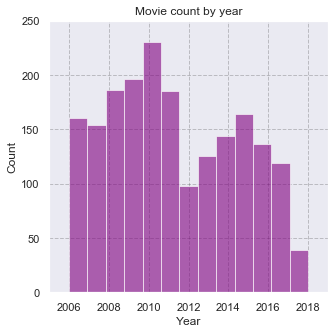

In [16]:
fig = plt.figure(figsize = (5, 5))
plt.hist(clean_opus_movie_data_df['production_year'], color = 'purple', bins=13, alpha=0.6)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Movie count by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xlim(2005, 2019)
plt.ylim(0, 250)
plt.show();

In [17]:
#  As our data appears to be inconsistent over the years, tracking the total box office sales per year would lead us to believe
#  that movie sales are tracking downward.  Perhaps it will be smarter to look at box office returns divided by the total
#  number of movies we have each year.  I will add a column with value of 1 for each movie, so when we groupby and sum, we will
#  have the count of movies each year.

clean_opus_movie_data_df['count'] = np.ones((len(clean_opus_movie_data_df),), dtype=int)
grouped_year = clean_opus_movie_data_df.groupby('production_year').sum()
grouped_year

,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,world_wide_box_office,count
production_year,,,,,,,,
2006,4463026000,7151000000,7866798829,9154837119,21.0,10591.0,17021635948,160
2007,5685055400,6808400000,7737047694,10017031787,20.0,15160.0,17754079481,154
2008,6573798600,8231300000,9033843970,12229451455,17.0,18549.0,21263295425,186
2009,13812279600,9188600000,11095682192,13908982588,17.0,19432.0,25004664780,196
2010,30033273000,11136000000,12163970312,16238238343,24.0,23883.0,28402208655,230
2011,26952568500,11862200000,13564607516,21651711525,29.0,20004.0,35216319041,185
2012,15935629800,6309500000,7438295847,12533031533,25.0,10618.0,19971327380,98
2013,22582342500,6666200000,8419190236,13286218454,21.0,13724.0,21705408690,125
2014,28032874400,8304900000,11019305329,17666448901,22.0,15802.0,28685754230,144


In [18]:
#  As a check, the count values are the same that we saw above using value_counts().  Now let's add a column of box_office per
#  movie, for each of domestic, international, and world-wide and display in millions for readability.

grouped_year['avg_dom_per_movie(mils)'] = grouped_year['domestic_box_office'] / grouped_year['count'] / 1000000
grouped_year['avg_int_per_movie(mils)'] = grouped_year['international_box_office'] / grouped_year['count'] / 1000000
grouped_year['avg_ww_per_movie(mils)'] = grouped_year['world_wide_box_office'] / grouped_year['count'] / 1000000
grouped_year

,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,world_wide_box_office,count,avg_dom_per_movie(mils),avg_int_per_movie(mils),avg_ww_per_movie(mils)
production_year,,,,,,,,,,,
2006,4463026000,7151000000,7866798829,9154837119,21.0,10591.0,17021635948,160,49.167493,57.217732,106.385225
2007,5685055400,6808400000,7737047694,10017031787,20.0,15160.0,17754079481,154,50.240569,65.045661,115.286230
2008,6573798600,8231300000,9033843970,12229451455,17.0,18549.0,21263295425,186,48.569054,65.749739,114.318793
2009,13812279600,9188600000,11095682192,13908982588,17.0,19432.0,25004664780,196,56.610623,70.964197,127.574820
2010,30033273000,11136000000,12163970312,16238238343,24.0,23883.0,28402208655,230,52.886827,70.601036,123.487864
2011,26952568500,11862200000,13564607516,21651711525,29.0,20004.0,35216319041,185,73.322203,117.036279,190.358481
2012,15935629800,6309500000,7438295847,12533031533,25.0,10618.0,19971327380,98,75.900978,127.888077,203.789055
2013,22582342500,6666200000,8419190236,13286218454,21.0,13724.0,21705408690,125,67.353522,106.289748,173.643270
2014,28032874400,8304900000,11019305329,17666448901,22.0,15802.0,28685754230,144,76.522954,122.683673,199.206627


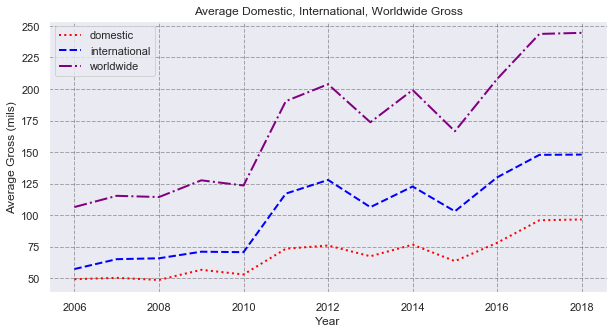

In [19]:
#  Now we can look at the graphs over time for box office results

plt.figure(figsize=(10, 5))
plt.plot(grouped_year.index, grouped_year['avg_dom_per_movie(mils)'], color='red', linewidth=2.0, linestyle=':')
plt.plot(grouped_year.index, grouped_year['avg_int_per_movie(mils)'], color='blue', linewidth=2.0, linestyle='--')
plt.plot(grouped_year.index, grouped_year['avg_ww_per_movie(mils)'], color='purple', linewidth=2.0, linestyle='-.')

plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.title('Average Domestic, International, Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Average Gross (mils)')
plt.legend(['domestic','international', 'worldwide'], loc=2)
plt.savefig('../images/avg_gross.png')
plt.show();

In [20]:
# Now let's look at the movie ratings
clean_opus_movie_data_df.rating.value_counts()

PG-13        777
R            748
PG           311
Not Rated     40
G             36
Unknown       23
NC-17          1
Name: rating, dtype: int64

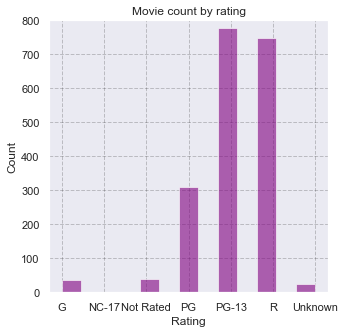

In [21]:
# So the bulk of our movies appear to be PG-13 and R.  But do they make the most money on average per movie?
fig = plt.figure(figsize = (5, 5))

clean_opus_movie_data_df.sort_values('rating', inplace=True) # sort ratings first so all graphs have same axis

plt.hist(clean_opus_movie_data_df['rating'], color = 'purple', bins=13, alpha=0.6)
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
plt.title('Movie count by rating')
plt.xlabel('Rating')
plt.ylabel('Count')
# plt.xlim(2005, 2019)
plt.ylim(0, 800)
plt.show();

In [22]:
# The count column we added will also show up how many movies are in each rating when we group by rating
grouped_rating = clean_opus_movie_data_df.groupby('rating').sum()
grouped_rating

,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,world_wide_box_office,count
rating,,,,,,,,,
G,72339,3119543600,2398500000,2894929346,4922162550,9.0,3181.0,7817091896,36
NC-17,2007,47450100,15000000,4604982,60562448,0.0,158.0,65167430,1
Not Rated,80486,7356734000,906350000,74881536,2084335950,5.0,3875.0,2159217486,40
PG,625509,39756121100,22526100000,28251132706,42940235337,57.0,30011.0,71191368043,311
PG-13,1562796,101384897700,52548900000,64978659825,99751004663,141.0,83164.0,164729664488,777
R,1504414,104099054800,24446270000,28338595610,34425043430,81.0,77309.0,62763639040,748
Unknown,46252,4256192300,596600000,0,425308994,2.0,1623.0,425308994,23


In [23]:
#  As a check, the count values are the same that we saw above using value_counts().  Now let's add a column of box_office per
#  movie in each rating, for each of domestic, international, and world-wide and display in millions for readability.

grouped_rating['avg_dom_per_movie(mils)'] = grouped_rating['domestic_box_office'] / grouped_rating['count'] / 1000000
grouped_rating['avg_int_per_movie(mils)'] = grouped_rating['international_box_office'] / grouped_rating['count'] / 1000000
grouped_rating['avg_ww_per_movie(mils)'] = grouped_rating['world_wide_box_office'] / grouped_rating['count'] / 1000000
grouped_rating

,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,sequel,running_time,world_wide_box_office,count,avg_dom_per_movie(mils),avg_int_per_movie(mils),avg_ww_per_movie(mils)
rating,,,,,,,,,,,,
G,72339,3119543600,2398500000,2894929346,4922162550,9.0,3181.0,7817091896,36,80.414704,136.726738,217.141442
NC-17,2007,47450100,15000000,4604982,60562448,0.0,158.0,65167430,1,4.604982,60.562448,65.167430
Not Rated,80486,7356734000,906350000,74881536,2084335950,5.0,3875.0,2159217486,40,1.872038,52.108399,53.980437
PG,625509,39756121100,22526100000,28251132706,42940235337,57.0,30011.0,71191368043,311,90.839655,138.071496,228.911151
PG-13,1562796,101384897700,52548900000,64978659825,99751004663,141.0,83164.0,164729664488,777,83.627619,128.379671,212.007290
R,1504414,104099054800,24446270000,28338595610,34425043430,81.0,77309.0,62763639040,748,37.885823,46.022785,83.908608
Unknown,46252,4256192300,596600000,0,425308994,2.0,1623.0,425308994,23,0.000000,18.491695,18.491695


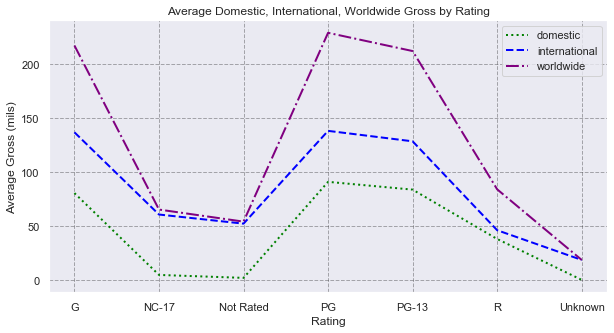

In [24]:
#  Now we can look at the graphs by rating for box office results

plt.figure(figsize=(10, 5))
plt.plot(grouped_rating.index, grouped_rating['avg_dom_per_movie(mils)'], color='green', linewidth=2.0, linestyle=':')
plt.plot(grouped_rating.index, grouped_rating['avg_int_per_movie(mils)'], color='blue', linewidth=2.0, linestyle='--')
plt.plot(grouped_rating.index, grouped_rating['avg_ww_per_movie(mils)'], color='purple', linewidth=2.0, linestyle='-.')

plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.title('Average Domestic, International, Worldwide Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Gross (mils)')
plt.legend(['domestic','international', 'worldwide'], loc=1)
plt.savefig('../images/rating_avg_gross.png')
plt.show();

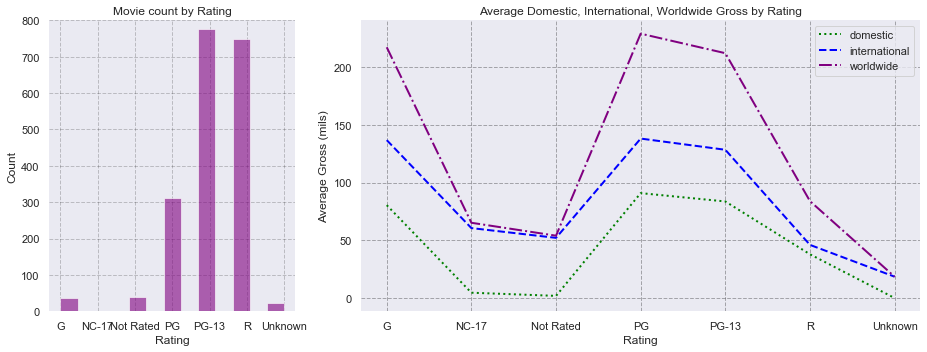

In [25]:
# Let's see if we can get these plots side-by-side.  Using gridspec to change size of subplots.

f = plt.figure(figsize =(13,5))
gs = f.add_gridspec(1, 3)
f_ax0 = f.add_subplot(gs[0, 0])
f_ax1 = f.add_subplot(gs[0, 1:])

f_ax0.hist(clean_opus_movie_data_df['rating'], color = 'purple', bins=13, alpha=0.6)
f_ax0.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
f_ax0.set(ylim=(0, 800), ylabel="Count", xlabel="Rating", title="Movie count by Rating")

f_ax1.plot(grouped_rating.index, grouped_rating['avg_dom_per_movie(mils)'], color='green', linewidth=2.0, linestyle=':')
f_ax1.plot(grouped_rating.index, grouped_rating['avg_int_per_movie(mils)'], color='blue', linewidth=2.0, linestyle='--')
f_ax1.plot(grouped_rating.index, grouped_rating['avg_ww_per_movie(mils)'], color='purple', linewidth=2.0, linestyle='-.')

f_ax1.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
f_ax1.set(ylabel="Average Gross (mils)", xlabel="Rating", title="Average Domestic, International, Worldwide Gross by Rating")
f_ax1.legend(['domestic','international', 'worldwide'], loc=1)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('../images/count_and_avg_by_rating.png')
plt.show();

## Conclusion:

Looking at avg movie revenue by year we can see a definite increase in box office sales over time.  To truly be able to know if the industry is growing however, we would want to account for inflation over the years.  Also measuring profit instead of gross sales would ensure us that movies are not costing so much more to make now that it is overshadowing the increase in revenue.  

Most of the movies in our dataset are rated either PG-13 or R.  Let's make the assumption that the same ratio is true for all movies produced.  When we look at the average movie revenue by rating, we see that the top grossing movie ratings are PG, followed by G, and then PG-13.  These would be the ratings that Microsoft should focus on as they generate the most revenue.

For better results, we would need to know that our dataset is representative of the entire population of movies produced in this time period.  Instead, what we know is that this data is only for movies with a production budget over $10 million.